In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mserr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Reading the datasets
train_x = pd.read_csv("C:\\Users\\Kotu Devi Priyanka\\Desktop\\Priya\\Big data\\dataset\\train.csv",index_col=0)
train_x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
train_y = train_x['SalePrice']
train_x.drop('SalePrice',axis=1,inplace=True)
train_x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal


In [4]:
test_x = pd.read_csv("C:\\Users\\Kotu Devi Priyanka\\Desktop\\Priya\\Big data\\dataset\\test.csv",index_col=0)
test_x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [5]:
# As a first step of pre-processing remove columns with null value ratio greater than provided limit
sample_size = len(train_x)
sample_size

1460

In [6]:
sample_size = len(test_x)
sample_size

1459

In [7]:
#Train dataset
train_col_with_nullvalues=[[col,float(train_x[col].isnull().sum())/float(sample_size)] for col in train_x.columns if train_x[col].isnull().sum()]
train_col_with_nullvalues


[['LotFrontage', 0.17751884852638794],
 ['Alley', 0.9383139136394791],
 ['MasVnrType', 0.0054832076764907475],
 ['MasVnrArea', 0.0054832076764907475],
 ['BsmtQual', 0.025359835503769704],
 ['BsmtCond', 0.025359835503769704],
 ['BsmtExposure', 0.02604523646333105],
 ['BsmtFinType1', 0.025359835503769704],
 ['BsmtFinType2', 0.02604523646333105],
 ['Electrical', 0.0006854009595613434],
 ['FireplaceQu', 0.4729266620973269],
 ['GarageType', 0.055517477724468814],
 ['GarageYrBlt', 0.055517477724468814],
 ['GarageFinish', 0.055517477724468814],
 ['GarageQual', 0.055517477724468814],
 ['GarageCond', 0.055517477724468814],
 ['PoolQC', 0.995887594242632],
 ['Fence', 0.8080877313228239],
 ['MiscFeature', 0.9636737491432488]]

In [8]:
#Test dataset
test_col_with_nullvalues=[[col,float(test_x[col].isnull().sum())/float(sample_size)] for col in test_x.columns if test_x[col].isnull().sum()]
test_col_with_nullvalues

[['MSZoning', 0.0027416038382453737],
 ['LotFrontage', 0.15558601782042494],
 ['Alley', 0.9266620973269363],
 ['Utilities', 0.0013708019191226869],
 ['Exterior1st', 0.0006854009595613434],
 ['Exterior2nd', 0.0006854009595613434],
 ['MasVnrType', 0.010966415352981495],
 ['MasVnrArea', 0.01028101439342015],
 ['BsmtQual', 0.03015764222069911],
 ['BsmtCond', 0.030843043180260453],
 ['BsmtExposure', 0.03015764222069911],
 ['BsmtFinType1', 0.02878684030157642],
 ['BsmtFinSF1', 0.0006854009595613434],
 ['BsmtFinType2', 0.02878684030157642],
 ['BsmtFinSF2', 0.0006854009595613434],
 ['BsmtUnfSF', 0.0006854009595613434],
 ['TotalBsmtSF', 0.0006854009595613434],
 ['BsmtFullBath', 0.0013708019191226869],
 ['BsmtHalfBath', 0.0013708019191226869],
 ['KitchenQual', 0.0006854009595613434],
 ['Functional', 0.0013708019191226869],
 ['FireplaceQu', 0.5003427004797807],
 ['GarageType', 0.0520904729266621],
 ['GarageYrBlt', 0.053461274845784786],
 ['GarageFinish', 0.053461274845784786],
 ['GarageCars', 0.0

In [9]:
print(len(train_col_with_nullvalues))
print(len(test_col_with_nullvalues))

19
33


In [10]:
train_col_to_drop=[x for (x,y) in train_col_with_nullvalues if y>0.3]
train_col_to_drop


['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [11]:
test_col_to_drop=[x for (x,y) in test_col_with_nullvalues if y>0.3]
test_col_to_drop

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [12]:
train_x.drop(train_col_to_drop,axis=1,inplace=True)
# test_x.drop(col_to_drop,axis=1,inplace=True)
print(train_x)
# print(test_x)

      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
1             60       RL         65.0     8450   Pave      Reg         Lvl   
2             20       RL         80.0     9600   Pave      Reg         Lvl   
3             60       RL         68.0    11250   Pave      IR1         Lvl   
4             70       RL         60.0     9550   Pave      IR1         Lvl   
5             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1456          60       RL         62.0     7917   Pave      Reg         Lvl   
1457          20       RL         85.0    13175   Pave      Reg         Lvl   
1458          70       RL         66.0     9042   Pave      Reg         Lvl   
1459          20       RL         68.0     9717   Pave      Reg         Lvl   
1460          20       RL         75.0     9937   Pa

In [13]:
test_x.drop(test_col_to_drop,axis=1,inplace=True)
# test_x.drop(col_to_drop,axis=1,inplace=True)
print(test_x)

      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
1461          20       RH         80.0    11622   Pave      Reg         Lvl   
1462          20       RL         81.0    14267   Pave      IR1         Lvl   
1463          60       RL         74.0    13830   Pave      IR1         Lvl   
1464          60       RL         78.0     9978   Pave      IR1         Lvl   
1465         120       RL         43.0     5005   Pave      IR1         HLS   
...          ...      ...          ...      ...    ...      ...         ...   
2915         160       RM         21.0     1936   Pave      Reg         Lvl   
2916         160       RM         21.0     1894   Pave      Reg         Lvl   
2917          20       RL        160.0    20000   Pave      Reg         Lvl   
2918          85       RL         62.0    10441   Pave      Reg         Lvl   
2919          60       RL         74.0     9627   Pa

In [14]:
# As a second pre-processing step find all categorical columns and one hot  encode them. 
# Before one hot encode fill all null values with dummy in those columns.  
# Some categorical columns in train_x may not have null values in train_x but have null values in test_x.
# To overcome this problem we will add a row to the train_x with all dummy values for categorical values. 
# Once one hot encoding is complete drop the added dummy column



In [15]:
# Train dataset
train_categorical_columns=[col for col in train_x.columns if train_x[col].dtype==object]
train_categorical_columns
print(len(train_categorical_columns))
train_ordinal_columns=[col for col in train_x.columns if col not in train_categorical_columns]
train_ordinal_columns
print(len(train_ordinal_columns))

38
36


In [16]:
#Test datset
test_categorical_columns=[col for col in test_x.columns if test_x[col].dtype==object]
test_categorical_columns
print(len(test_categorical_columns))
test_ordinal_columns=[col for col in test_x.columns if col not in test_categorical_columns]
test_ordinal_columns
print(len(test_ordinal_columns))

38
36


In [17]:
train_unique = []
for col in train_categorical_columns:
    train_unique.append(len(train_x[col].unique()))
print(train_unique)
# train_x['SaleCondition']

[5, 2, 4, 4, 2, 5, 3, 25, 9, 8, 5, 8, 6, 8, 15, 16, 5, 4, 5, 6, 5, 5, 5, 7, 7, 6, 5, 2, 6, 4, 7, 7, 4, 6, 6, 3, 9, 6]


In [18]:
test_unique = []
for col in test_categorical_columns:
    test_unique.append(len(test_x[col].unique()))
print(test_unique)

[6, 2, 4, 4, 2, 5, 3, 25, 9, 5, 5, 7, 6, 4, 14, 16, 5, 4, 5, 6, 5, 5, 5, 7, 7, 4, 5, 2, 4, 5, 8, 7, 4, 5, 6, 3, 10, 6]


In [19]:
dummy_row=list()
for col in train_x.columns:
    if col in train_categorical_columns:
        dummy_row.append("dummy")
    else:
        dummy_row.append("")
new_row = pd.DataFrame([dummy_row],columns=train_x.columns)
train_x = pd.concat([train_x,new_row],axis=0, ignore_index=True)
train_x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,20,RL,85,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal
1459,20,RL,75,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,68,0,0,0,0,0,6,2008,WD,Normal


In [20]:
for col in train_categorical_columns:
    train_x[col].fillna(value="dummy",inplace=True)
    test_x[col].fillna(value="dummy",inplace=True)
    
enc = OneHotEncoder(drop='first',sparse=False)
enc.fit(train_x[train_categorical_columns])
trainx_enc=pd.DataFrame(enc.transform(train_x[train_categorical_columns]))
trainx_enc.columns=enc.get_feature_names(train_categorical_columns)

testx_enc=pd.DataFrame(enc.transform(test_x[train_categorical_columns]))
testx_enc.columns=enc.get_feature_names(train_categorical_columns)

train_x = pd.concat([train_x[train_ordinal_columns],trainx_enc],axis=1,ignore_index=True)
test_x = pd.concat([test_x[train_ordinal_columns],testx_enc],axis=1,ignore_index=True)

train_x.drop(train_x.tail(1).index,inplace=True)
train_x

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
0,60,65,8450,7,5,2003,2003,196,706,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,80,9600,6,8,1976,1976,0,978,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,60,68,11250,7,5,2001,2002,162,486,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,60,9550,7,5,1915,1970,0,216,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60,84,14260,8,5,2000,2000,350,655,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62,7917,6,5,1999,2000,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1456,20,85,13175,6,6,1978,1988,119,790,163,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1457,70,66,9042,7,9,1941,2006,0,275,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1458,20,68,9717,5,6,1950,1996,0,49,1029,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
test_x.shape

(2918, 270)

In [22]:
imputer = KNNImputer(n_neighbors=2)
imputer.fit(train_x)
trainx_filled = imputer.transform(train_x)
trainx_filled=pd.DataFrame(trainx_filled,columns=train_x.columns)
trainx_filled

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1456,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1457,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1458,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,1029.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
testx_filled = imputer.transform(test_x)
testx_filled=pd.DataFrame(trainx_filled,columns=test_x.columns)
testx_filled.reset_index(drop=True,inplace=True)
testx_filled

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1456,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1457,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1458,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,1029.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
# Standardization

scaler = preprocessing.StandardScaler().fit(train_x)
train_x=scaler.transform(trainx_filled)
test_x=scaler.transform(testx_filled)
print(test_x)
print(train_x)



[[ 0.07337496 -0.20803433 -0.20714171 ...  0.4676514  -0.30599503
   0.        ]
 [-0.87256276  0.40989452 -0.09188637 ...  0.4676514  -0.30599503
   0.        ]
 [ 0.07337496 -0.08444856  0.07347998 ...  0.4676514  -0.30599503
   0.        ]
 ...
 [ 0.30985939 -0.16683907 -0.14781027 ...  0.4676514  -0.30599503
   0.        ]
 [-0.87256276 -0.08444856 -0.08016039 ...  0.4676514  -0.30599503
   0.        ]
 [-0.87256276  0.20391824 -0.05811155 ...  0.4676514  -0.30599503
   0.        ]]
[[ 0.07337496 -0.20803433 -0.20714171 ...  0.4676514  -0.30599503
   0.        ]
 [-0.87256276  0.40989452 -0.09188637 ...  0.4676514  -0.30599503
   0.        ]
 [ 0.07337496 -0.08444856  0.07347998 ...  0.4676514  -0.30599503
   0.        ]
 ...
 [ 0.30985939 -0.16683907 -0.14781027 ...  0.4676514  -0.30599503
   0.        ]
 [-0.87256276 -0.08444856 -0.08016039 ...  0.4676514  -0.30599503
   0.        ]
 [-0.87256276  0.20391824 -0.05811155 ...  0.4676514  -0.30599503
   0.        ]]


In [25]:
test_x = pd.DataFrame(test_x)
train_x = pd.DataFrame(train_x)

In [26]:
test_x.drop(test_x.tail(1).index,inplace=True)


In [27]:
type(train_x)

pandas.core.frame.DataFrame

In [29]:
train_x.shape

(1460, 270)

In [30]:
test_x.shape

(1459, 270)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y.values.ravel(), test_size=0.3, random_state=42)

In [32]:
# Applying regression techniques(Linear, Ridge, Lasso, Elasticnet)


reg = LinearRegression()
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))



0.9342383788782177
-3.072819326776321e+21


In [33]:
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error
lin = LinearRegression()
lin.fit(X_train, y_train)
# print(lin.coef_)
lin.intercept_
predictions = lin.predict(X_test)
print(sqrt(mean_squared_error(y_test, predictions)))
import sklearn
from sklearn.metrics import r2_score
sklearn.metrics.r2_score(y_test, predictions, sample_weight=None, multioutput='uniform_average')


4630596222158824.0


-3.072819326776321e+21

In [34]:
import statsmodels.api as sm
from statsmodels.api import OLS
model = sm.OLS(y_train,X_train)
results = model.fit()
print(results.summary())


C:\Users\Kotu Devi Priyanka\anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Kotu Devi Priyanka\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     49.41
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:34:32   Log-Likelihood:                -11566.
No. Observations:                1022   AIC:                         2.359e+04
Df Residuals:                     793   BIC:                         2.472e+04
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           4700.7708   5408.333      0.869      0.3

In [35]:
import statsmodels.api as sm
from statsmodels.api import OLS
model = sm.OLS(y_test,X_test)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     26.50
Date:                Thu, 01 Oct 2020   Prob (F-statistic):          8.33e-100
Time:                        16:34:33   Log-Likelihood:                -4887.6
No. Observations:                 438   AIC:                         1.019e+04
Df Residuals:                     233   BIC:                         1.102e+04
Df Model:                         204                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           2182.7685   8118.137      0.269      0.7

In [36]:
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error
Ridgereg = Ridge(alpha = 0.5,tol = 0.1)
Ridgereg = Ridgereg.fit(X_train,y_train)
# print(Ridgereg.score(X_train,y_train))
# print(Ridgereg.score(X_test,y_test))

print(sqrt(mean_squared_error(y_test, Ridgereg.predict(X_test))))
print('R2 Value/Coefficient of Determination: {}'.format(Ridgereg.score(X_test,y_test)))
                                                                       

42487.964219610716
R2 Value/Coefficient of Determination: 0.7413008243552287


In [37]:
from sklearn.linear_model import Lasso
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error


lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
# lassoreg.predict(X_train)
print(sqrt(mean_squared_error(y_test, lassoreg.predict(X_test))))
print('R2 Value/Coefficient of Determination: {}'.format(lassoreg.score(X_test, y_test)))




43960.197085561056
R2 Value/Coefficient of Determination: 0.7230620576325931


C:\Users\Kotu Devi Priyanka\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200419973098.96747, tolerance: 615098412.8205527
  model = cd_fast.enet_coordinate_descent(


In [38]:
from sklearn.linear_model import ElasticNet
Elas = ElasticNet(alpha=0.001, normalize=True)
Elas.fit(X_train, y_train)

# print(sqrt(mean_squared_error(ytrain, Elas.predict(xtrain))))
print(sqrt(mean_squared_error(y_test, Elas.predict(X_test))))
print('R2 Value/Coefficient of Determination: {}'.format(Elas.score(X_test, y_test)))


31038.877276048268
R2 Value/Coefficient of Determination: 0.861937667282375


In [39]:
# test_x = np.array(test_x)
type(test_x)

pandas.core.frame.DataFrame

In [40]:
test_x

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
0,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,-0.288653,...,-0.301962,-0.045376,0.390293,0.0,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,0.0
1,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,-0.288653,...,-0.301962,-0.045376,0.390293,0.0,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,0.0
2,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,-0.288653,...,-0.301962,-0.045376,0.390293,0.0,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,0.0
3,0.309859,-0.414011,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,-0.288653,...,-0.301962,-0.045376,0.390293,0.0,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995,0.0
4,0.073375,0.574676,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,-0.288653,...,-0.301962,-0.045376,0.390293,0.0,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.872563,-0.331620,-0.302353,0.651479,-0.517200,1.084115,0.975575,-0.572835,-0.073781,-0.288653,...,-0.301962,-0.045376,0.390293,0.0,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,0.0
1455,0.073375,-0.331620,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.572835,-0.973018,-0.288653,...,-0.301962,-0.045376,0.390293,0.0,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,0.0
1456,-0.872563,0.615871,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084610,0.759659,0.722112,...,-0.301962,-0.045376,0.390293,0.0,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,0.0
1457,0.309859,-0.166839,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.572835,-0.369871,-0.288653,...,-0.301962,-0.045376,0.390293,0.0,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,0.0


In [41]:
score_train=[]
score_test=[]
mse_train=[]
mse_test=[]
alpha=[]
for sigma in np.linspace(0.1, 10,10):
    alpha.append(sigma)
    Ridgereg = Ridge(alpha = 0.5,tol = 0.0001)
    Ridgereg = Ridgereg.fit(X_train,y_train)
    score_train.append(round(Ridgereg.score(X_train, y_train),10))
    score_test.append(round(Ridgereg.score(X_test, y_test),10))
#     print("score_train = ",score_train)
#     print("score_test = ", score_test)
    mse_train.append(sqrt(mean_squared_error(y_train, Ridgereg.predict(X_train))))
    mse_test.append(sqrt(mean_squared_error(y_test, Ridgereg.predict(X_test))))
print(alpha,'\n',"Score train = ", score_train, '\n',"Score test = ", score_test,'\n',"MSE train =", mse_train, '\n',mse_test) 

[0.1, 1.2000000000000002, 2.3000000000000003, 3.4000000000000004, 4.5, 5.6, 6.7, 7.800000000000001, 8.9, 10.0] 
 Score train =  [0.9340670836, 0.9340670836, 0.9340670836, 0.9340670836, 0.9340670836, 0.9340670836, 0.9340670836, 0.9340670836, 0.9340670836, 0.9340670836] 
 Score test =  [0.7413008244, 0.7413008244, 0.7413008244, 0.7413008244, 0.7413008244, 0.7413008244, 0.7413008244, 0.7413008244, 0.7413008244, 0.7413008244] 
 MSE train = [19920.397407981978, 19920.397407981978, 19920.397407981978, 19920.397407981978, 19920.397407981978, 19920.397407981978, 19920.397407981978, 19920.397407981978, 19920.397407981978, 19920.397407981978] 
 [42487.964219610716, 42487.964219610716, 42487.964219610716, 42487.964219610716, 42487.964219610716, 42487.964219610716, 42487.964219610716, 42487.964219610716, 42487.964219610716, 42487.964219610716]


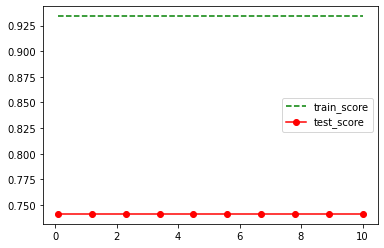

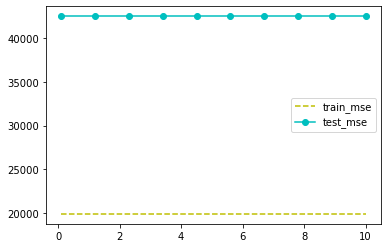

In [42]:
plt.figure(1)
plt.plot(alpha, score_train, 'g--',label="train_score")
plt.plot(alpha, score_test, 'r-o',label="test_score")
plt.xlabel='Alpha'
plt.legend()
plt.figure(2)
plt.plot(alpha, mse_train, 'y--',label="train_mse")
plt.plot(alpha, mse_test, 'c-o',label="test_mse")
plt.xlabel='Alpha'
plt.legend()
plt.show()

In [44]:
testpred=pd.DataFrame(Elas.predict(test_x),columns=['SalePrice'])
testpred.index.name = 'Id'
testpred.to_csv("test_pred_1.csv")